In [3]:
import pandas as pd
import numpy as np

READING THE DATASET

In [7]:
import pandas as pd
import numpy as np
import zipfile

# Specify the path to your ZIP file
zip_file_path = '/content/Datasets.zip'

# Specify the path to the CSV file within the ZIP archive
csv_file_path_in_zip = 'Datasets/dataset.csv'  # Replace with the actual path within the ZIP if different


# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract the CSV file to a BytesIO object
    with zip_ref.open(csv_file_path_in_zip) as csv_file:
        # Read the CSV data into a pandas DataFrame
        data = pd.read_csv(csv_file)

# Now you can work with the 'data' DataFrame
print(data.head())  # Print the first few rows of the DataFrame, for example

             timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0  


CHECKING MISSING VALUES

In [8]:
#TASK-02 CHECKING MISSING VALUES & IF THERE
# prompt: Using dataframe data: CHECKING MISSING VALUES & IF THERE ARE SOME DUBLICATE ROWS OR NOT

# Check for missing values in the DataFrame
print(data.isnull().sum())

# Check for duplicate rows in the DataFrame
print(f"\nNumber of duplicate rows: {data.duplicated().sum()}")
# Display the duplicate rows (optional)
# print(data[data.duplicated()])

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

Number of duplicate rows: 0


DISCRETE FEATURES ON SEASON/HOLIDAY/WEEKEND/WEATHERCODE

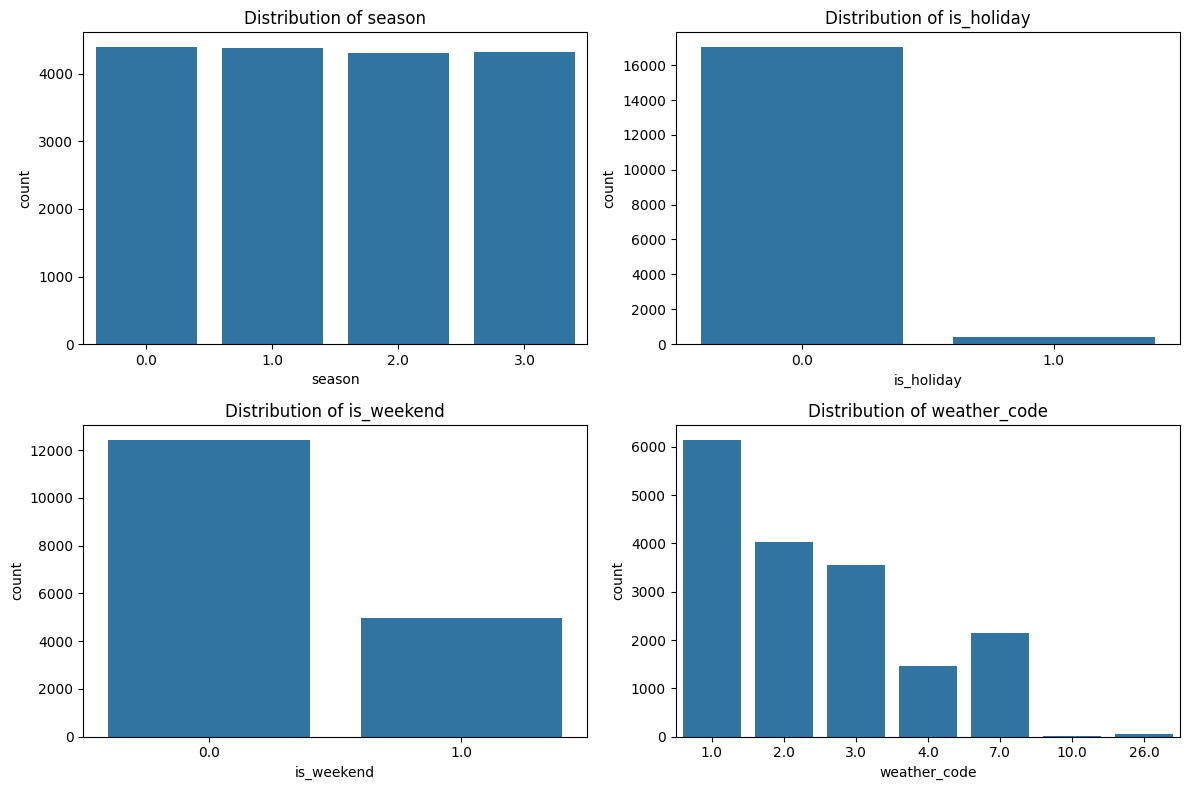

In [9]:
# prompt: Using dataframe data: PLOTTING THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES ON SEASON/HOLIDAY/WEEKEND/WEATHERCODE

import matplotlib.pyplot as plt
import seaborn as sns

# List of discrete features to plot
discrete_features = ['season', 'is_holiday', 'is_weekend', 'weather_code']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate through features and create plots
for i, feature in enumerate(discrete_features):
    sns.countplot(x=feature, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

LOOKING AT THE DATA TYPES OF EACH VARIBLE,TRANSFORM TIMESTRAP IN TYPE& SET IT AS INDEX

In [10]:
#TASK-04 LOOKING AT THE DATA TYPES OF EACH VARIABLE, TRANSFORM TIMESTAMP IN TYPE & SET IT AS INDEX
# Check if 'timestamp' is already the index
if 'timestamp' not in data.columns:
    # If 'timestamp' is not a column, it's likely the index
    # Reset the index to make 'timestamp' a column again
    # drop=True to avoid inserting the existing index as a new column
    data = data.reset_index(drop=True)
    # Rename the 'index' column (if it exists) to 'timestamp'
    if 'index' in data.columns:
        data = data.rename(columns={'index': 'timestamp'})

# Convert 'timestamp' column to datetime objects
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Set the 'timestamp' column as the index of the DataFrame
data = data.set_index('timestamp')
print(data)

                      cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                              
2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
...                   ...  ...  ...    ...         ...           ...   
2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0           3.0   
2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0           4.0   
2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0           4.0   
2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0           4.0   
2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0           2.0   

                     is_holiday  is_weekend  season  
timestamp

MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC

In [11]:
import pandas as pd

# Check if 'timestamp' is already a column, if not, reset the index
if 'timestamp' not in data.columns:
    data = data.reset_index()
    # Rename 'index' column to 'timestamp' if it exists
    if 'index' in data.columns:
        data = data.rename(columns={'index': 'timestamp'})

# Convert the 'timestamp' column to datetime objects
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract features using .assign() for cleaner code
data = data.assign(
    day_of_week=data['timestamp'].dt.dayofweek,  # Day of the week (0=Monday, 6=Sunday)
    day_of_month=data['timestamp'].dt.day,       # Day of the month (1-31)
    hour=data['timestamp'].dt.hour,             # Hour of the day (0-23)
    month=data['timestamp'].dt.month,           # Month of the year (1-12)
    year=data['timestamp'].dt.year              # Year
)

# Define a function to determine the season
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

# Apply the function to create the season column
data['season'] = data['month'].apply(get_season)

# Optionally set 'timestamp' back as the index
# data = data.set_index('timestamp')

# Display the updated DataFrame (optional)
print(data.head())

            timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0 2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1 2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2 2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3 2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4 2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  day_of_week  day_of_month  hour  month  \
0         0.0         1.0  winter            6             4     0      1   
1         0.0         1.0  winter            6             4     1      1   
2         0.0         1.0  winter            6             4     2      1   
3         0.0         1.0  winter            6             4     3      1   
4         0.0         1.0  winter            6             4     4      1   

   year  
0  2015  
1  2015  
2  2015  
3  2015  
4  2015  


VISUALIZING THE CORRELATION WITH A HEATMAP

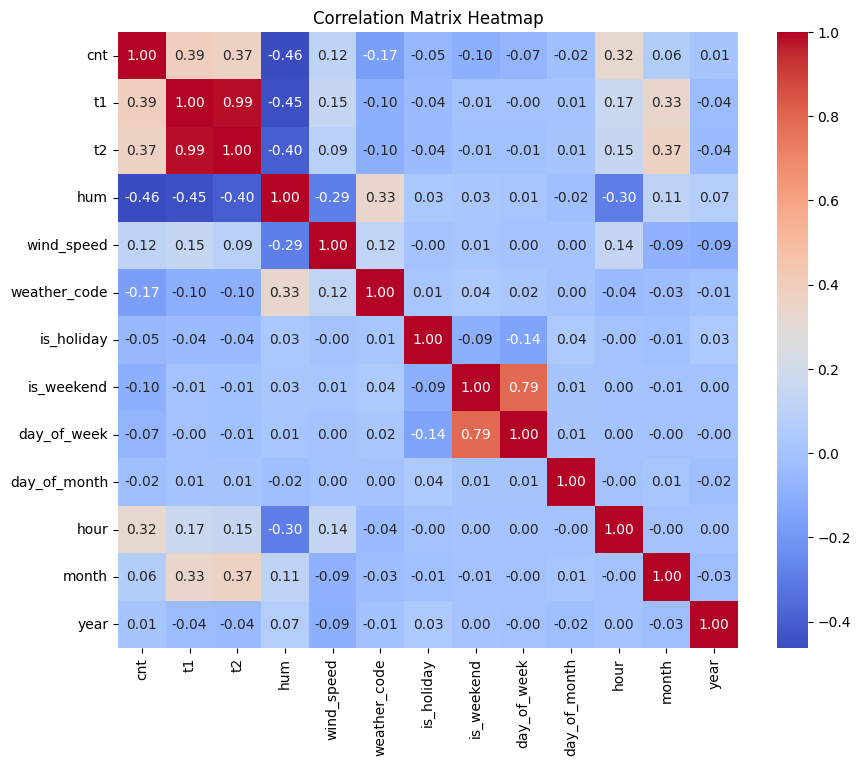

In [12]:
# prompt: Using dataframe data: VISUALIZING THE CORRELATION WITH A HEATMAP

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your Pandas DataFrame
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT

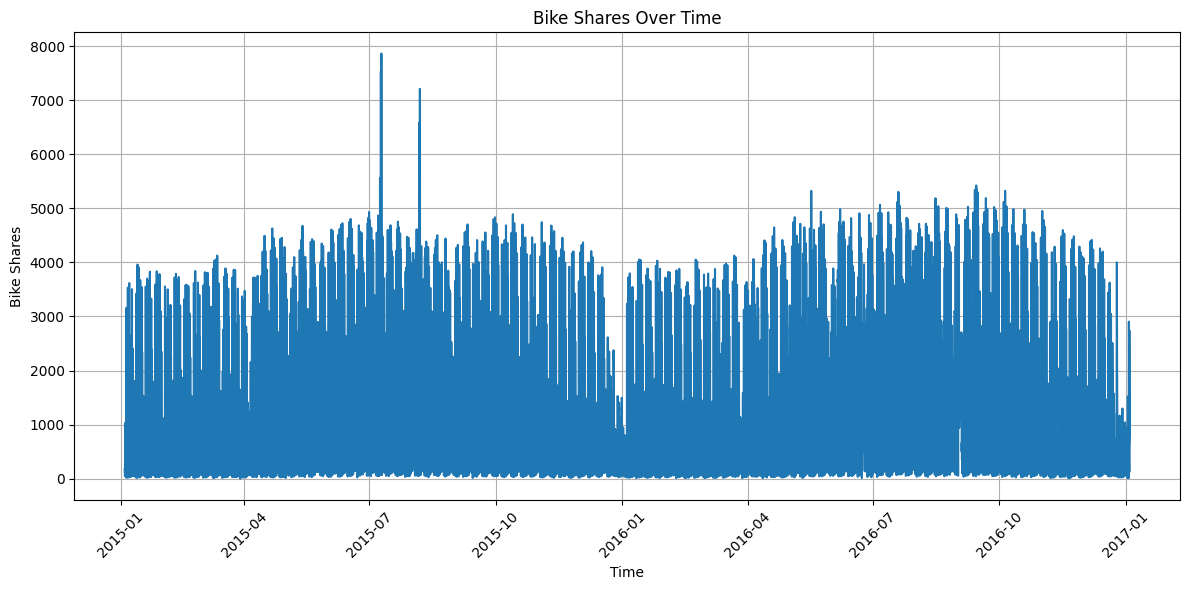

In [18]:
# prompt: Using dataframe data: PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT

import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'timestamp' column to datetime objects
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['cnt'])

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Bike Shares')
plt.title('Bike Shares Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


 PLOTTING BIKE SHARES BY HOURS ON (HOLIDAYS,WEEKEND,SEASON)

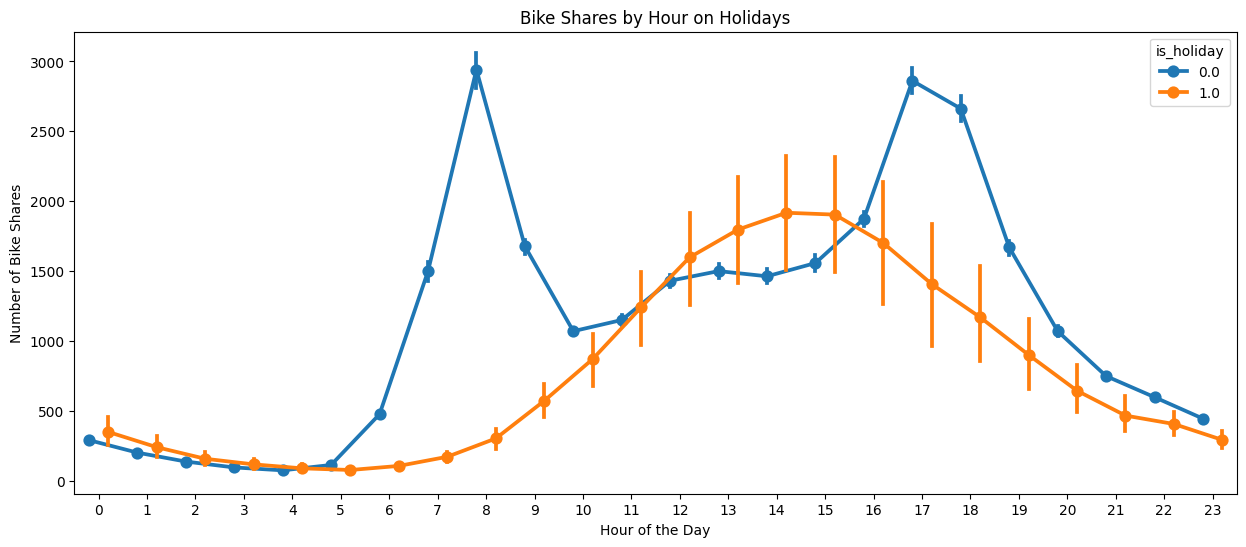

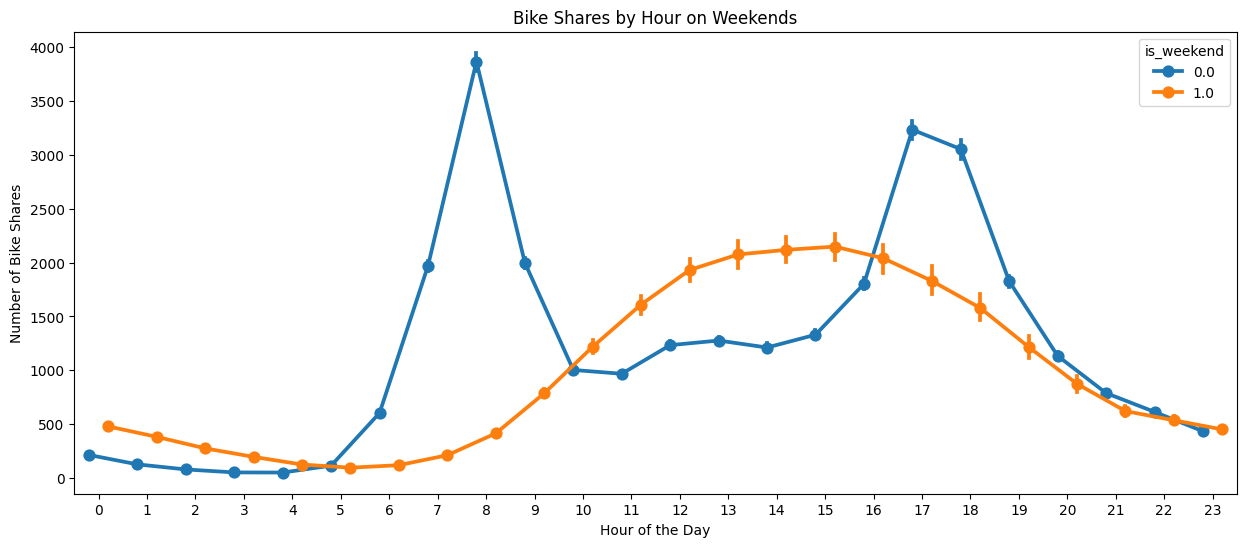

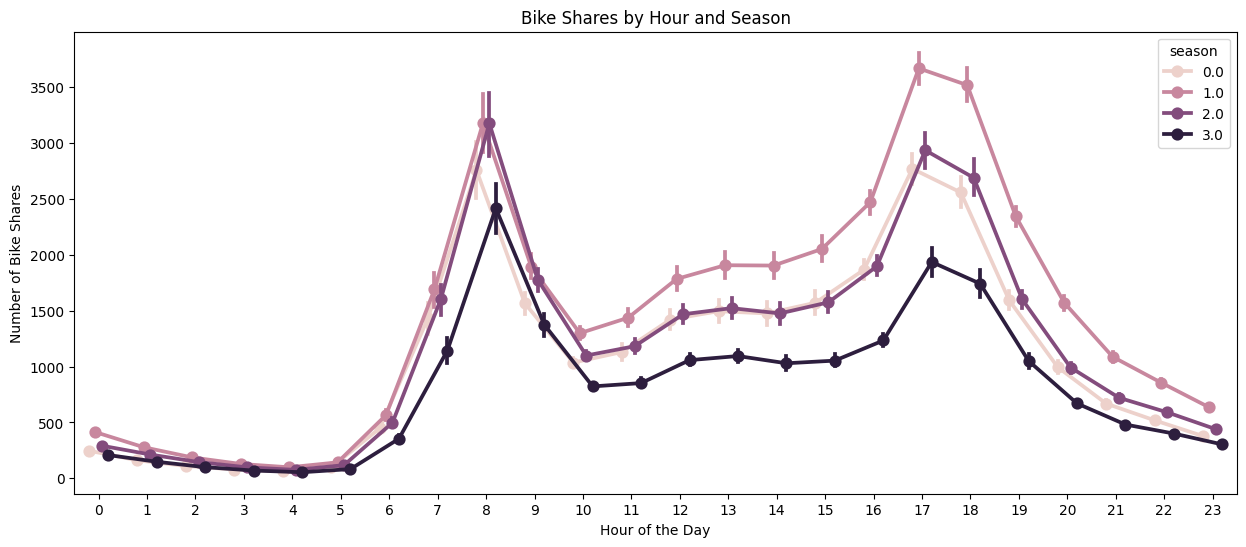

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert timestamp to datetime objects
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract hour from timestamp
data['hour'] = data['timestamp'].dt.hour

# Create the plot
plt.figure(figsize=(15, 6))
sns.pointplot(x='hour', y='cnt', hue='is_holiday', data=data, dodge=0.4)
plt.title('Bike Shares by Hour on Holidays')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Shares')
plt.show()

plt.figure(figsize=(15, 6))
sns.pointplot(x='hour', y='cnt', hue='is_weekend', data=data, dodge=0.4)
plt.title('Bike Shares by Hour on Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Shares')
plt.show()

plt.figure(figsize=(15, 6))
sns.pointplot(x='hour', y='cnt', hue='season', data=data, dodge=0.4)
plt.title('Bike Shares by Hour and Season')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Shares')
plt.show()


PLOTTING BIKE SHARES BY DAY OF WEEK

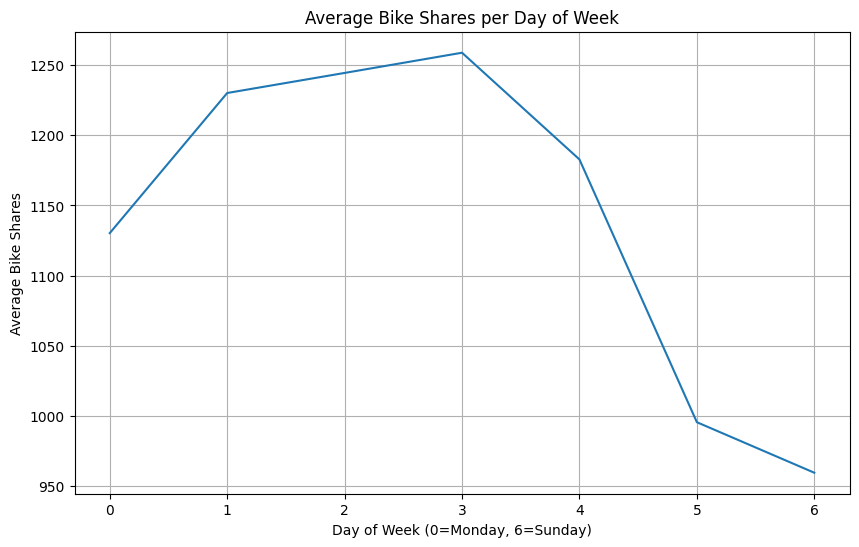

In [20]:
# prompt: Using dataframe data: PLOTTING BIKE SHARES BY DAY OF WEEK

import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'timestamp' column to datetime objects if it's not already
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract the day of the week (0=Monday, 6=Sunday)
data['day_of_week'] = data['timestamp'].dt.dayofweek

# Group by day of the week and calculate the mean bike share count
bike_shares_by_day = data.groupby('day_of_week')['cnt'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(bike_shares_by_day.index, bike_shares_by_day.values)
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Bike Shares')
plt.title('Average Bike Shares per Day of Week')
plt.xticks(range(7))  # Ensure all days of the week are displayed
plt.grid(True)
plt.show()

BARPLOT

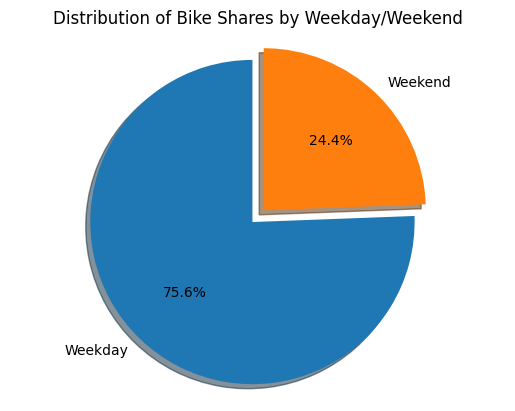

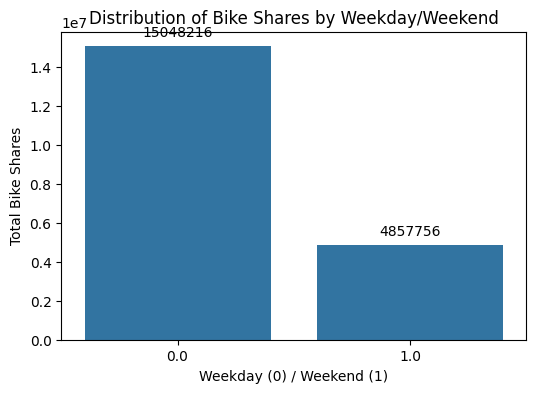

In [25]:
#TASK-14 VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT
# prompt: Using dataframe data: VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total bike shares for weekdays and weekends
weekday_share = data[data['is_weekend'] == 0]['cnt'].sum()
weekend_share = data[data['is_weekend'] == 1]['cnt'].sum()


# Create a pie chart
labels = ['Weekday', 'Weekend']
sizes = [weekday_share, weekend_share]
explode = (0.1, 0)  # explode the 1st slice

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Bike Shares by Weekday/Weekend')
plt.show()


# Create a bar plot
share_by_day = data.groupby('is_weekend')['cnt'].sum()
share_by_day = share_by_day.reset_index()
plt.figure(figsize=(6,4))
ax = sns.barplot(x="is_weekend", y="cnt", data=share_by_day)
plt.title("Distribution of Bike Shares by Weekday/Weekend")
plt.xlabel("Weekday (0) / Weekend (1)")
plt.ylabel("Total Bike Shares")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()


PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON

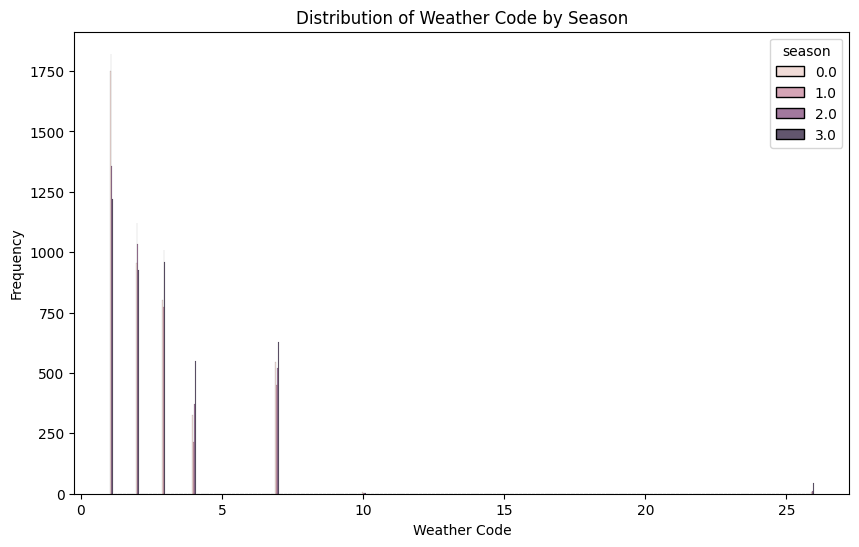

In [26]:
# prompt: Using dataframe data: PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON

import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(data=data, x='weather_code', hue='season', multiple='dodge', shrink=.8)
plt.title('Distribution of Weather Code by Season')
plt.xlabel('Weather Code')
plt.ylabel('Frequency')
plt.show()